In [1]:
#Import Packages
import numpy as np
import os
import pickle
from multicontact_learning_local_objectives.python.machine_learning.ml_utils import *
import matplotlib.pyplot as plt #Matplotlib
import shutil

print("Double check the Path for storing trajectories is correct")

Double check the Path for storing trajectories is correct


In [2]:
#Define Path for Storing Trajectories
#Collect Data Points Path
#workingDirectory = "/home/jiayu/Desktop/multicontact_learning_local_objectives/data/large_slope_flat_patches/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_Standarized_Data/"
workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles/"
#NOTE: need to have "/" at the end
print("Double Check we provide the Correct Traj Path: \n", workingDirectory)

#Define dataset folder
#DataSetPath = workingDirectory + "/DataSet_Standarization"
#DataSetPath = workingDirectory + "/DataSet_OriginalForm"
TrainingSetPath = workingDirectory + "/DataSet/"+"TrainingSet_OriginalForm"
ValidationSetPath = workingDirectory + "/DataSet/"+"ValidationSet_OriginalForm"
TestSetPath = workingDirectory + "/DataSet/"+"TestSet_OriginalForm"

#Path to store ML Model, create one if we dont have
ML_Model_Path = workingDirectory + "/ML_Models/"
if not (os.path.isdir(ML_Model_Path)):
    os.mkdir(ML_Model_Path)


Double Check we provide the Correct Traj Path: 
 /home/jiayu/Desktop/MLP_DataSet/Rubbles/


In [3]:
#Learning Code
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
#Load DataSet File

#dataset_file = DataSetPath + "/data_rubbles"+'.p'
trainingset_file = TrainingSetPath + "/data"+'.p'
trainingset = pickle.load(open(trainingset_file,"rb"))

validationset_file = ValidationSetPath + "/data"+'.p'
validationset = pickle.load(open(validationset_file,"rb"))

testset_file = TestSetPath + "/data"+'.p'
testset = pickle.load(open(testset_file,"rb"))

print("Set Up for Training Set")
print("World Frame Shift: ", trainingset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",trainingset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",trainingset["VectorScaleFactor"])
print("Number of Preview Steps: ", trainingset["NumPreviewSteps"])
print("Pre Process Mode: ",trainingset["PreProcessMode"])

print(" ")

print("Set Up for Validation Set")
print("World Frame Shift: ", validationset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",validationset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",validationset["VectorScaleFactor"])
print("Number of Preview Steps: ", validationset["NumPreviewSteps"])
print("Pre Process Mode: ",validationset["PreProcessMode"])

print(" ")

print("Set Up for Test Set")
print("World Frame Shift: ", testset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",testset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",testset["VectorScaleFactor"])
print("Number of Preview Steps: ", testset["NumPreviewSteps"])
print("Pre Process Mode: ",testset["PreProcessMode"])

Set Up for Training Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
Set Up for Validation Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
Set Up for Test Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm


In [5]:
#Test Train Split, for now No Test data
#x_train, x_test, y_train, y_test = train_test_split(dataset["input"], dataset["output"], test_size = 0.01)
x_train = trainingset["input"]
y_train = trainingset["output"]

x_valid = validationset["input"]
y_valid = validationset["output"]

x_test = testset["input"]
y_test = testset["output"]

#Get Left Foot to see
#x_train=x_train[::2]
#y_train=y_train[::2]


#Decide input and outpu dimensionality
d_in = x_train[0].shape[0]
print("input dim: ", d_in)
d_out = y_train[0].shape[0]
print("output dim:", d_out)
print(" ")

print("Num of Data Points: ", x_train.shape[0])

# #Double check with mean and std
# print("Inputs: ")
# print("Input Mean: ", x_train.mean(axis=0))
# print("Input Std: ", x_train.std(axis=0))
# print("Input Max: ", x_train.max(axis=0))
# print("Input Min: ", x_train.min(axis=0))
# print(" ")


# print("Output Mean: ", y_train.mean(axis=0))
# print("Output Std: ", y_train.std(axis=0))
# print("Output Max: ", y_train.max(axis=0))
# print("Output Min: ", y_train.min(axis=0))

# print("X shape: ", x_train.shape)
# print("y shape: ", y_train.shape)

input dim:  85
output dim: 11
 
Num of Data Points:  121200


In [6]:
#Define learning model
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out)
# ])
# loss: 4.6886e-04 - val_loss: 5.4786e-04

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)), #tanh
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out, activation='linear')
# ])

#True code
model = Sequential([
    Dense(256, activation='relu', input_shape=(d_in,)), #tanh
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(d_out, activation='linear')
])


In [7]:
from tensorflow.keras.losses import Huber

#Train Learning Model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='mse') #0.0001
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss=Huber(delta=3.0))


#history = model.fit(x_train, y_train, epochs = 50000, validation_split=0.0, batch_size = x_train.shape[0])
#history = model.fit(x_train, y_train, epochs = 3000, validation_split=0.0, batch_size = 1280) #1280
history = model.fit(x = x_train, y = y_train, epochs = 1000, batch_size = 1280, validation_data = (x_valid, y_valid)) #1280, 1000 epoch

Epoch 1/1000
95/95 [==============================] - 1s 6ms/step - loss: 0.0066 - val_loss: 5.1753e-04
Epoch 2/1000
95/95 [==============================] - 0s 5ms/step - loss: 4.3657e-04 - val_loss: 3.7070e-04
Epoch 3/1000
95/95 [==============================] - 0s 5ms/step - loss: 3.3677e-04 - val_loss: 3.0811e-04
Epoch 4/1000
95/95 [==============================] - 0s 5ms/step - loss: 2.9257e-04 - val_loss: 2.7600e-04
Epoch 5/1000
95/95 [==============================] - 0s 5ms/step - loss: 2.6550e-04 - val_loss: 2.5348e-04
Epoch 6/1000
95/95 [==============================] - 0s 5ms/step - loss: 2.4600e-04 - val_loss: 2.3739e-04
Epoch 7/1000
95/95 [==============================] - 0s 5ms/step - loss: 2.3119e-04 - val_loss: 2.2370e-04
Epoch 8/1000
95/95 [==============================] - 0s 5ms/step - loss: 2.1911e-04 - val_loss: 2.1227e-04
Epoch 9/1000
95/95 [==============================] - 0s 5ms/step - loss: 2.0796e-04 - val_loss: 2.0217e-04
Epoch 10/1000
95/95 [===========

95/95 [==============================] - 0s 5ms/step - loss: 8.3518e-05 - val_loss: 8.2578e-05
Epoch 77/1000
95/95 [==============================] - 0s 4ms/step - loss: 8.3239e-05 - val_loss: 8.2282e-05
Epoch 78/1000
95/95 [==============================] - 0s 4ms/step - loss: 8.3178e-05 - val_loss: 8.3144e-05
Epoch 79/1000
95/95 [==============================] - 0s 4ms/step - loss: 8.2626e-05 - val_loss: 8.2741e-05
Epoch 80/1000
95/95 [==============================] - 0s 5ms/step - loss: 8.2146e-05 - val_loss: 8.6205e-05
Epoch 81/1000
95/95 [==============================] - 0s 5ms/step - loss: 8.2474e-05 - val_loss: 8.1149e-05
Epoch 82/1000
95/95 [==============================] - 0s 5ms/step - loss: 8.1809e-05 - val_loss: 8.2531e-05
Epoch 83/1000
95/95 [==============================] - 0s 4ms/step - loss: 8.2020e-05 - val_loss: 8.2727e-05
Epoch 84/1000
95/95 [==============================] - 0s 4ms/step - loss: 8.1652e-05 - val_loss: 8.1521e-05
Epoch 85/1000
95/95 [============

Epoch 151/1000
95/95 [==============================] - 0s 5ms/step - loss: 7.1278e-05 - val_loss: 7.3101e-05
Epoch 152/1000
95/95 [==============================] - 0s 4ms/step - loss: 7.1592e-05 - val_loss: 7.2769e-05
Epoch 153/1000
95/95 [==============================] - 0s 5ms/step - loss: 7.1577e-05 - val_loss: 7.4578e-05
Epoch 154/1000
95/95 [==============================] - 0s 5ms/step - loss: 7.1178e-05 - val_loss: 7.1896e-05
Epoch 155/1000
95/95 [==============================] - 0s 5ms/step - loss: 7.1286e-05 - val_loss: 7.2080e-05
Epoch 156/1000
95/95 [==============================] - 0s 4ms/step - loss: 7.0776e-05 - val_loss: 7.2285e-05
Epoch 157/1000
95/95 [==============================] - 0s 4ms/step - loss: 7.0930e-05 - val_loss: 7.1282e-05
Epoch 158/1000
95/95 [==============================] - 0s 5ms/step - loss: 7.1366e-05 - val_loss: 7.0947e-05
Epoch 159/1000
95/95 [==============================] - 0s 5ms/step - loss: 7.0687e-05 - val_loss: 7.2196e-05
Epoch 160/

95/95 [==============================] - 0s 5ms/step - loss: 6.5640e-05 - val_loss: 6.7237e-05
Epoch 226/1000
95/95 [==============================] - 0s 4ms/step - loss: 6.5233e-05 - val_loss: 6.7062e-05
Epoch 227/1000
95/95 [==============================] - 0s 5ms/step - loss: 6.5268e-05 - val_loss: 6.6437e-05
Epoch 228/1000
95/95 [==============================] - 0s 4ms/step - loss: 6.5183e-05 - val_loss: 6.6221e-05
Epoch 229/1000
95/95 [==============================] - 0s 4ms/step - loss: 6.4777e-05 - val_loss: 6.6175e-05
Epoch 230/1000
95/95 [==============================] - 0s 5ms/step - loss: 6.5237e-05 - val_loss: 6.6060e-05
Epoch 231/1000
95/95 [==============================] - 0s 4ms/step - loss: 6.4923e-05 - val_loss: 6.7121e-05
Epoch 232/1000
95/95 [==============================] - 0s 4ms/step - loss: 6.4866e-05 - val_loss: 6.5923e-05
Epoch 233/1000
95/95 [==============================] - 0s 5ms/step - loss: 6.4584e-05 - val_loss: 6.6121e-05
Epoch 234/1000
95/95 [===

95/95 [==============================] - 0s 4ms/step - loss: 6.0755e-05 - val_loss: 6.1997e-05
Epoch 300/1000
95/95 [==============================] - 0s 5ms/step - loss: 6.0901e-05 - val_loss: 6.1574e-05
Epoch 301/1000
95/95 [==============================] - 0s 4ms/step - loss: 6.0488e-05 - val_loss: 6.2124e-05
Epoch 302/1000
95/95 [==============================] - 0s 4ms/step - loss: 6.0574e-05 - val_loss: 6.3418e-05
Epoch 303/1000
95/95 [==============================] - 0s 5ms/step - loss: 6.0786e-05 - val_loss: 6.2875e-05
Epoch 304/1000
95/95 [==============================] - 0s 5ms/step - loss: 6.1073e-05 - val_loss: 6.2231e-05
Epoch 305/1000
95/95 [==============================] - 0s 4ms/step - loss: 6.0387e-05 - val_loss: 6.3301e-05
Epoch 306/1000
95/95 [==============================] - 0s 5ms/step - loss: 6.0593e-05 - val_loss: 6.1594e-05
Epoch 307/1000
95/95 [==============================] - 0s 4ms/step - loss: 6.0365e-05 - val_loss: 6.2062e-05
Epoch 308/1000
95/95 [===

95/95 [==============================] - 0s 5ms/step - loss: 5.7784e-05 - val_loss: 5.9570e-05
Epoch 374/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.7414e-05 - val_loss: 5.8925e-05
Epoch 375/1000
95/95 [==============================] - 0s 4ms/step - loss: 5.7919e-05 - val_loss: 6.0629e-05
Epoch 376/1000
95/95 [==============================] - 0s 4ms/step - loss: 5.7949e-05 - val_loss: 5.9747e-05
Epoch 377/1000
95/95 [==============================] - 0s 4ms/step - loss: 5.7079e-05 - val_loss: 5.9332e-05
Epoch 378/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.7562e-05 - val_loss: 5.9306e-05
Epoch 379/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.7324e-05 - val_loss: 5.9755e-05
Epoch 380/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.7137e-05 - val_loss: 5.9194e-05
Epoch 381/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.7060e-05 - val_loss: 5.8885e-05
Epoch 382/1000
95/95 [===

95/95 [==============================] - 0s 4ms/step - loss: 5.4794e-05 - val_loss: 5.7263e-05
Epoch 448/1000
95/95 [==============================] - 0s 4ms/step - loss: 5.5029e-05 - val_loss: 5.9467e-05
Epoch 449/1000
95/95 [==============================] - 0s 4ms/step - loss: 5.4970e-05 - val_loss: 5.7478e-05
Epoch 450/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.4962e-05 - val_loss: 5.7741e-05
Epoch 451/1000
95/95 [==============================] - 0s 4ms/step - loss: 5.5097e-05 - val_loss: 5.8977e-05
Epoch 452/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.4939e-05 - val_loss: 5.7168e-05
Epoch 453/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.4814e-05 - val_loss: 5.6706e-05
Epoch 454/1000
95/95 [==============================] - 0s 4ms/step - loss: 5.5349e-05 - val_loss: 5.7986e-05
Epoch 455/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.4581e-05 - val_loss: 5.7617e-05
Epoch 456/1000
95/95 [===

95/95 [==============================] - 0s 5ms/step - loss: 5.2909e-05 - val_loss: 5.5667e-05
Epoch 522/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.3020e-05 - val_loss: 5.6060e-05
Epoch 523/1000
95/95 [==============================] - 0s 4ms/step - loss: 5.2852e-05 - val_loss: 5.5973e-05
Epoch 524/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.3107e-05 - val_loss: 5.5173e-05
Epoch 525/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.2821e-05 - val_loss: 5.6003e-05
Epoch 526/1000
95/95 [==============================] - 0s 4ms/step - loss: 5.3035e-05 - val_loss: 5.5568e-05
Epoch 527/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.2752e-05 - val_loss: 5.5544e-05
Epoch 528/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.3100e-05 - val_loss: 5.5405e-05
Epoch 529/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.2719e-05 - val_loss: 5.5833e-05
Epoch 530/1000
95/95 [===

95/95 [==============================] - 0s 5ms/step - loss: 5.1052e-05 - val_loss: 5.3888e-05
Epoch 596/1000
95/95 [==============================] - 0s 4ms/step - loss: 5.1226e-05 - val_loss: 5.4349e-05
Epoch 597/1000
95/95 [==============================] - 0s 4ms/step - loss: 5.1176e-05 - val_loss: 5.3844e-05
Epoch 598/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.1486e-05 - val_loss: 5.4550e-05
Epoch 599/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.1094e-05 - val_loss: 5.4532e-05
Epoch 600/1000
95/95 [==============================] - 1s 5ms/step - loss: 5.1120e-05 - val_loss: 5.3937e-05
Epoch 601/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.0930e-05 - val_loss: 5.4533e-05
Epoch 602/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.0957e-05 - val_loss: 5.3854e-05
Epoch 603/1000
95/95 [==============================] - 0s 5ms/step - loss: 5.1115e-05 - val_loss: 5.5041e-05
Epoch 604/1000
95/95 [===

95/95 [==============================] - 0s 4ms/step - loss: 4.9726e-05 - val_loss: 5.2099e-05
Epoch 670/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.9678e-05 - val_loss: 5.2880e-05
Epoch 671/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.9478e-05 - val_loss: 5.2593e-05
Epoch 672/1000
95/95 [==============================] - 0s 5ms/step - loss: 4.9586e-05 - val_loss: 5.3235e-05
Epoch 673/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.9396e-05 - val_loss: 5.2442e-05
Epoch 674/1000
95/95 [==============================] - 0s 5ms/step - loss: 4.9715e-05 - val_loss: 5.2492e-05
Epoch 675/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.9544e-05 - val_loss: 5.4186e-05
Epoch 676/1000
95/95 [==============================] - 0s 5ms/step - loss: 4.9554e-05 - val_loss: 5.2687e-05
Epoch 677/1000
95/95 [==============================] - 0s 5ms/step - loss: 4.9327e-05 - val_loss: 5.2269e-05
Epoch 678/1000
95/95 [===

95/95 [==============================] - 0s 4ms/step - loss: 4.8093e-05 - val_loss: 5.1706e-05
Epoch 744/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.8055e-05 - val_loss: 5.1049e-05
Epoch 745/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.8349e-05 - val_loss: 5.1439e-05
Epoch 746/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.7899e-05 - val_loss: 5.1641e-05
Epoch 747/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.8055e-05 - val_loss: 5.1782e-05
Epoch 748/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.8194e-05 - val_loss: 5.1491e-05
Epoch 749/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.7977e-05 - val_loss: 5.1406e-05
Epoch 750/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.7975e-05 - val_loss: 5.2301e-05
Epoch 751/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.7888e-05 - val_loss: 5.1489e-05
Epoch 752/1000
95/95 [===

95/95 [==============================] - 0s 4ms/step - loss: 4.7098e-05 - val_loss: 5.0803e-05
Epoch 818/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.6996e-05 - val_loss: 5.0488e-05
Epoch 819/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.6770e-05 - val_loss: 5.0968e-05
Epoch 820/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.6461e-05 - val_loss: 5.0374e-05
Epoch 821/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.6748e-05 - val_loss: 5.0723e-05
Epoch 822/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.6998e-05 - val_loss: 5.0386e-05
Epoch 823/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.6586e-05 - val_loss: 5.0548e-05
Epoch 824/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.6681e-05 - val_loss: 5.0052e-05
Epoch 825/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.6834e-05 - val_loss: 5.0513e-05
Epoch 826/1000
95/95 [===

95/95 [==============================] - 0s 5ms/step - loss: 4.5768e-05 - val_loss: 4.9826e-05
Epoch 892/1000
95/95 [==============================] - 0s 5ms/step - loss: 4.5716e-05 - val_loss: 4.9812e-05
Epoch 893/1000
95/95 [==============================] - 0s 5ms/step - loss: 4.5846e-05 - val_loss: 4.9831e-05
Epoch 894/1000
95/95 [==============================] - 0s 5ms/step - loss: 4.5885e-05 - val_loss: 4.9801e-05
Epoch 895/1000
95/95 [==============================] - 0s 5ms/step - loss: 4.5801e-05 - val_loss: 4.9721e-05
Epoch 896/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.5555e-05 - val_loss: 5.0503e-05
Epoch 897/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.5773e-05 - val_loss: 5.0127e-05
Epoch 898/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.5546e-05 - val_loss: 5.0388e-05
Epoch 899/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.5789e-05 - val_loss: 4.9868e-05
Epoch 900/1000
95/95 [===

95/95 [==============================] - 0s 4ms/step - loss: 4.4854e-05 - val_loss: 5.1484e-05
Epoch 966/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.4862e-05 - val_loss: 4.9480e-05
Epoch 967/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.4705e-05 - val_loss: 4.9010e-05
Epoch 968/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.4693e-05 - val_loss: 4.9053e-05
Epoch 969/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.4745e-05 - val_loss: 4.8940e-05
Epoch 970/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.4675e-05 - val_loss: 4.9557e-05
Epoch 971/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.4775e-05 - val_loss: 4.8775e-05
Epoch 972/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.4698e-05 - val_loss: 4.9916e-05
Epoch 973/1000
95/95 [==============================] - 0s 4ms/step - loss: 4.4849e-05 - val_loss: 4.9431e-05
Epoch 974/1000
95/95 [===

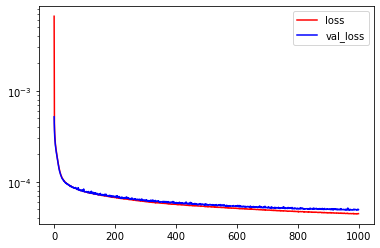

In [8]:
#Plot Training Progree
plt.plot(history.history['loss'], 'r', label='loss')
plt.yscale("log")
plt.plot(history.history['val_loss'], 'b', label='val_loss') if 'val_loss' in history.history else None
plt.legend()
plt.show()

In [9]:
#Save Trained Model
MLmodel_name = "NN_Model_Valid_" + trainingset["PreProcessMode"]
model.save(ML_Model_Path + MLmodel_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/jiayu/Desktop/MLP_DataSet/Rubbles//ML_Models/NN_Model_Valid_OriginalForm/assets


In [10]:
#Save DataSet Setttings
datasetSettings = {"Shift_World_Frame_Type":trainingset["Shift_World_Frame_Type"],
                   "VectorScaleFactor":trainingset["VectorScaleFactor"],
                   "NumPreviewSteps":trainingset["NumPreviewSteps"],
                   "Contact_Representation_Type":trainingset["Contact_Representation_Type"],
                   "TrainingLoss":history.history['loss']}
#Validation loss
datasetSettings["ValidationLoss"] = history.history['val_loss'] if 'val_loss' in history.history else None

#ProProcess
datasetSettings["PreProcessMode"] = trainingset["PreProcessMode"]
datasetSettings["Scaler_X"] = trainingset["Scaler_X"]
datasetSettings["Scaler_Y"] = trainingset["Scaler_Y"]

#Dump File
pickle.dump(datasetSettings, open(ML_Model_Path + MLmodel_name+ '/datasetSettings' +'.p', "wb"))

In [11]:
#Show Prediction Result for Training
from sklearn import preprocessing

datapoint_num = 3
y_pred_temp = model.predict(np.array([x_train[datapoint_num]]))

print(x_train[datapoint_num])

#Recover to original format
if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_originalform = y_pred_temp/trainingset["VectorScaleFactor"]
    y_true_originalform = y_train[datapoint_num]/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    y_pred_originalform = dataset["Scaler_Y"].inverse_transform(y_pred_temp)
    y_true_originalform = dataset["Scaler_Y"].inverse_transform(np.array([y_train[datapoint_num]]))
else:
    raise Exception("Unknow Pre Process Mode")


print("predicted result: \n",y_pred_originalform)
print("true value: \n",y_true_originalform)
print("diff: \n", np.absolute(y_pred_originalform - y_true_originalform))

[-1.46418906e-01 -8.49456480e-02  7.99586336e-01  1.48521400e-01
  1.07545024e-01 -1.11004699e-04  1.54833590e-08 -1.93962072e-09
 -2.29540166e-09 -2.79980848e-01 -1.94277001e-01  4.15072207e-02
  0.00000000e+00  4.24969733e-01  8.65458148e-01  0.00000000e+00
 -1.50030267e-01  8.65458148e-01  0.00000000e+00 -1.50030267e-01
 -1.34541852e-01  0.00000000e+00  4.24969733e-01 -1.34541852e-01
  0.00000000e+00 -1.50030267e-01 -1.34541852e-01  4.71389217e-02
 -7.25030267e-01 -1.34541852e-01  4.71389217e-02 -7.25030267e-01
 -1.13454185e+00 -4.71389217e-02 -1.50030267e-01 -1.13454185e+00
 -4.71389217e-02  4.24969733e-01 -1.34541852e-01 -5.17224150e-02
 -1.50030267e-01 -1.34541852e-01  5.17224150e-02 -1.50030267e-01
 -1.13454185e+00  5.17224150e-02  4.24969733e-01 -1.13454185e+00
 -5.17224150e-02  9.99969733e-01  8.65458148e-01 -8.32569316e-02
  4.24969733e-01  8.65458148e-01 -8.32569316e-02  4.24969733e-01
 -1.34541852e-01  8.32569316e-02  9.99969733e-01 -1.34541852e-01
  8.32569316e-02  9.99969

Data Kept Original Form, But need to scale back to meters
[0.23600886 0.23614269 0.23642108 0.23642461 0.23643673 0.23646535
 0.23654178 0.23663527 0.23671324 0.23682972 0.23697776 0.23714085
 0.23728726 0.23738933 0.23798134 0.23800822 0.23801365 0.23813657
 0.23830015 0.23832691 0.23835243 0.23869546 0.23900303 0.23951152
 0.23978041 0.23985697 0.23997326 0.24003007 0.24011755 0.24013782
 0.24030981 0.24056982 0.24076874 0.24090193 0.24096934 0.24111293
 0.2411354  0.24123707 0.241253   0.24138815 0.24182713 0.24184276
 0.2419344  0.24194565 0.24203428 0.24204318 0.24227741 0.24240201
 0.24245299 0.24255158 0.24319565 0.24326344 0.24370576 0.2440157
 0.24415845 0.24436414 0.24449356 0.24458738 0.24463679 0.24468766
 0.24482775 0.24492956 0.24499547 0.24499579 0.24518743 0.24519539
 0.24528161 0.2453702  0.24538149 0.24605803 0.2461513  0.24619454
 0.24626882 0.24650771 0.24687656 0.24735649 0.24739374 0.24816161
 0.24826022 0.24897721 0.24899463 0.24903516 0.24906088 0.24920249
 0.24

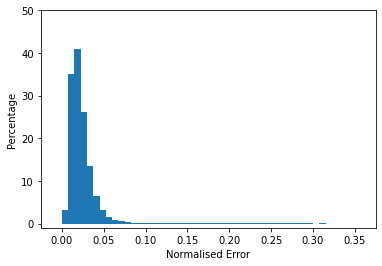

In [12]:
#Error Stat with Training Set
import matplotlib.pyplot as plt

y_pred_train = model.predict(x_train)


if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_train_originalform = y_pred_train/trainingset["VectorScaleFactor"]
    y_true_train_originalform = y_train/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", trainingset["PreProcessMode"])
    y_pred_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_pred_train)
    y_true_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_train)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_train_originalform-y_pred_train_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted[-300:])  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())

Data Kept Original Form, But need to scale back to meters
[0.0033313  0.00346541 0.00353714 ... 0.31839441 0.31935815 0.35135725]
Error Mean:  0.025052085534083193
Error Std 0.02140831077007152


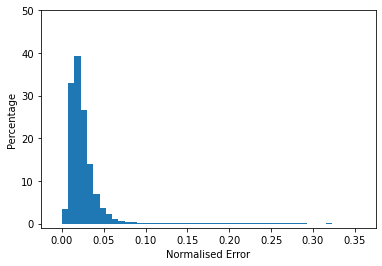

In [13]:
#Error Stat with Validation Set

y_pred_valid = model.predict(x_valid)


if validationset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_valid_originalform = y_pred_valid/validationset["VectorScaleFactor"]
    y_true_valid_originalform = y_valid/validationset["VectorScaleFactor"]
elif validationset["PreProcessMode"] == "Standarization" or validationset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_valid)
    y_true_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_valid)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_valid_originalform-y_pred_valid_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())

Data Kept Original Form, But need to scale back to meters
[0.00184869 0.00228481 0.00279936 ... 0.32147956 0.32973017 0.32990142]
Error Mean:  0.023198824589737117
Error Std 0.021627270312226707


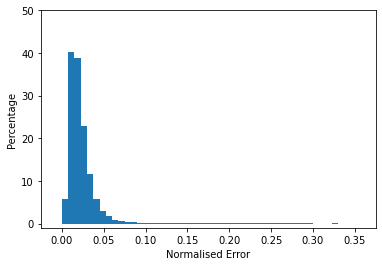

In [24]:
#Error Stat with Test Set

y_pred_test = model.predict(x_test)


if testset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_test_originalform = y_pred_test/testset["VectorScaleFactor"]
    y_true_test_originalform = y_test/testset["VectorScaleFactor"]
elif testset["PreProcessMode"] == "Standarization" or testset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_test_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_test)
    y_true_test_originalform = validationset["Scaler_Y"].inverse_transform(y_test)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_pred_test_originalform-y_true_test_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())